## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Load and preprocess data

In [2]:
df = pd.read_csv(
    'D:\\TARUN\\MBIT\\summer internship\\LSTM dataset\\Walmart_Sales.csv')
print(df.columns)  # Check the column names

# Adjust the column name based on your dataset
df.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Weekly_Sales'].values.reshape(-1, 1))

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16156\3539569603.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Create dataset

In [3]:
def create_dataset(data, time_step=1):
    dataX, dataY = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(data[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

## Split data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Build and train model

In [16]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
5139/5139 [==============================] - 42s 7ms/step - loss: 0.0033
Epoch 2/50
5139/5139 [==============================] - 35s 7ms/step - loss: 0.0027
Epoch 3/50
5139/5139 [==============================] - 35s 7ms/step - loss: 0.0025
Epoch 4/50
5139/5139 [==============================] - 35s 7ms/step - loss: 0.0023
Epoch 5/50
5139/5139 [==============================] - 38s 7ms/step - loss: 0.0020
Epoch 6/50
5139/5139 [==============================] - 38s 7ms/step - loss: 0.0018
Epoch 7/50
5139/5139 [==============================] - 37s 7ms/step - loss: 0.0018
Epoch 8/50
5139/5139 [==============================] - 36s 7ms/step - loss: 0.0016
Epoch 9/50
5139/5139 [==============================] - 35s 7ms/step - loss: 0.0015
Epoch 10/50
5139/5139 [==============================] - 37s 7ms/step - loss: 0.0015
Epoch 11/50
5139/5139 [==============================] - 36s 7ms/step - loss: 0.0014
Epoch 12/50
5139/5139 [==============================] - 51s 10ms/step - l

## Make predictions

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

41/41 [==============================] - 0s 4ms/step


## Inverse transform to get actual values

In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

## Calculate performance metrics

In [19]:
train_rmse = math.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = math.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
train_mae = mean_absolute_error(y_train[0], train_predict[:, 0])
test_mae = mean_absolute_error(y_test[0], test_predict[:, 0])
train_r2 = r2_score(y_train[0], train_predict[:, 0])
test_r2 = r2_score(y_test[0], test_predict[:, 0])

print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}, Test MAE: {test_mae}')
print(f'Train R^2: {train_r2}, Test R^2: {test_r2}')

Train RMSE: 109970.06995414381, Test RMSE: 134521.66524699572
Train MAE: 58788.095252967505, Test MAE: 70176.25989883268
Train R^2: 0.9613576057356369, Test R^2: 0.9468846542307443


## Plot results

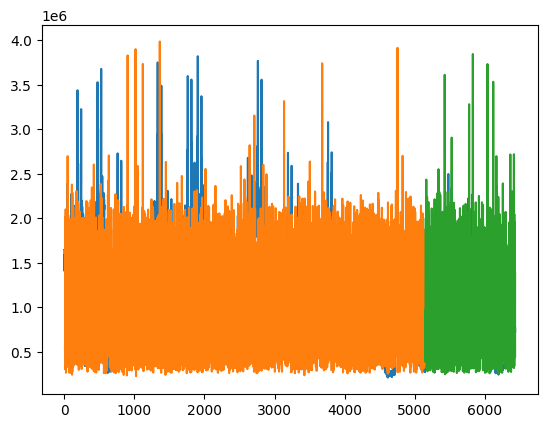

In [20]:
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 1):len(train_predict) +
          len(test_predict) + (time_step * 1), :] = test_predict

plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

these results suggest that your LSTM model performs well in capturing the patterns in the sales data. The errors (RMSE and MAE) are relatively low, and the R² values are high, indicating that the model explains a significant portion of the variance in the data

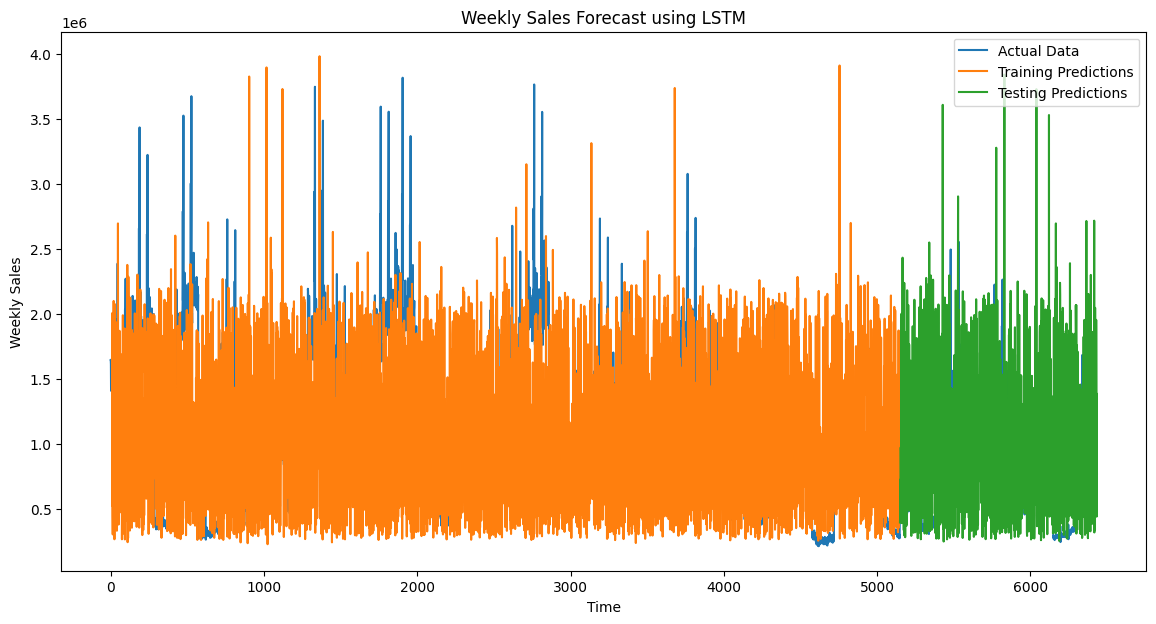

In [21]:
# Plot results
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 1):len(train_predict) +
          len(test_predict) + (time_step * 1), :] = test_predict

plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Testing Predictions')

plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Forecast using LSTM')
plt.legend()
plt.show()

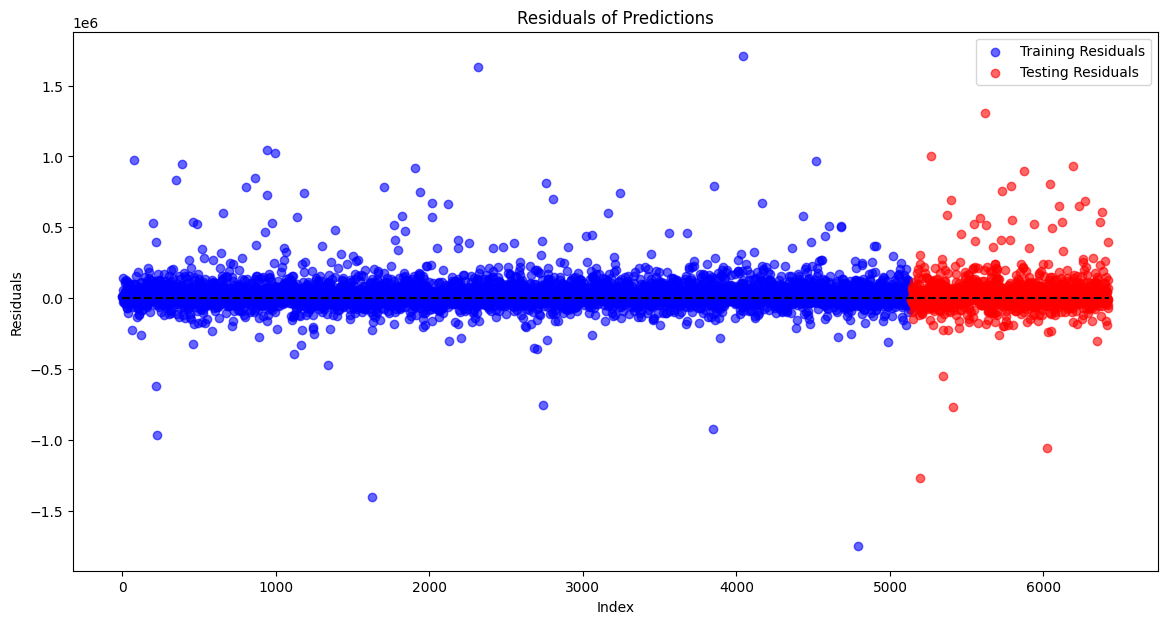

In [22]:
# Plot residuals
train_residuals = y_train[0] - train_predict[:, 0]
test_residuals = y_test[0] - test_predict[:, 0]

plt.figure(figsize=(14, 7))
plt.scatter(np.arange(len(train_residuals)), train_residuals,
            label='Training Residuals', color='blue', alpha=0.6)
plt.scatter(np.arange(len(train_residuals), len(train_residuals) + len(test_residuals)),
            test_residuals, label='Testing Residuals', color='red', alpha=0.6)
plt.hlines(0, 0, len(train_residuals) + len(test_residuals),
           colors='black', linestyles='dashed')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()

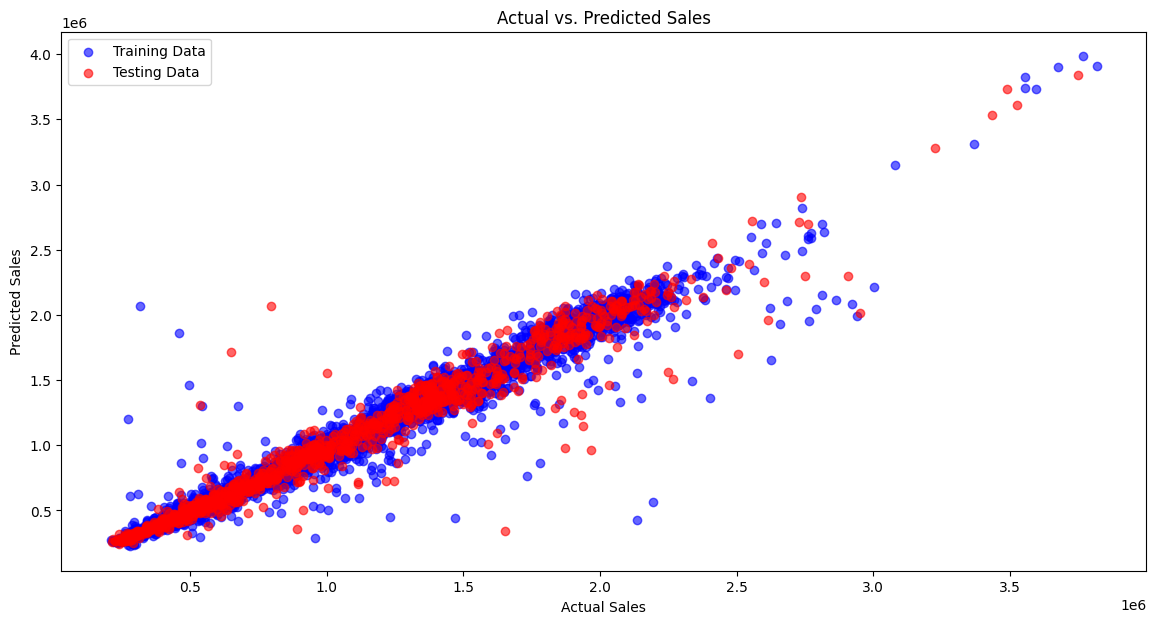

In [23]:
# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_train, train_predict, label='Training Data',
            color='blue', alpha=0.6)
plt.scatter(y_test, test_predict, label='Testing Data', color='red', alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()